# Лабораторна робота №6

In [28]:
print(f"Варіант {ord("A") % 10 + 1}")

Варіант 6


## Вимоги:
- У кожній комірці вказати постановку задачі та рівняння у LaTeX
- Побудувати три прямі:
  - кожна — на окремому графіку з різним кольором і типом лінії;
  - усі графіки мають спільну вісь ординат і підпис.
- Побудувати всі прямі разом на одному графіку:
  - різні кольори й типи ліній;
  - додати легенду, сітку, назву, підписи осей;
  - позначити точки перетину (знайти через `numpy.linalg.solve`);
  - заповнити область перетину кольором.

## Постанова задачі (варіант №6)

Необхідно побудувати три прямі, задані рівняннями:
$$
\begin{cases}
-10.3x_{1} + 10.2x_{2} = 70,\\
4.7x_{1} + 12.3x_{2} = 173,\\
13.2x_{1} + 8.8x_{2} = 282.
\end{cases}
$$

Кожне рівняння описує лінійну залежність між змінними $x_{1}$ та $x_{2}$.
Для побудови графіків виразимо $x_{2}$ через $x_{1}$:

$$
x_{2}^{(1)} = \frac{70 + 10.3x_{1}}{10.2}, \qquad
x_{2}^{(2)} = \frac{173 - 4.7x_{1}}{12.3}, \qquad
x_{2}^{(3)} = \frac{282 - 13.2x_{1}}{8.8}.
$$

Отримані рівняння дозволяють розрахувати $x_{2}$ у вибраному діапазоні $x_{1}$ та побудувати графіки трьох прямих у спільній системі координат.

Для визначення точок перетину потрібно розв’язати системи рівнянь для кожної пари прямих:

- L₁ ∩ L₂
  $$
  \begin{cases}
  -10.3x_{1} + 10.2x_{2} = 70,\\
  4.7x_{1} + 12.3x_{2} = 173.
  \end{cases}
  $$

- L₁ ∩ L₃
  $$
  \begin{cases}
  -10.3x_{1} + 10.2x_{2} = 70,\\
  13.2x_{1} + 8.8x_{2} = 282.
  \end{cases}
  $$

- L₂ ∩ L₃
  $$
  \begin{cases}
  4.7x_{1} + 12.3x_{2} = 173,\\
  13.2x_{1} + 8.8x_{2} = 282.
  \end{cases}
  $$

Такі системи розв’язуються у матричному вигляді $A \cdot X = B$, де $A$ — матриця коефіцієнтів при $x_{1}, x_{2}$, а $B$ — вектор вільних членів. Розв’язання виконується за допомогою:

```python
np.linalg.solve(A, B)

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# --- СИСТЕМИ ДЛЯ ТОЧОК ПЕРЕТИНУ ---

# L1 vs L2
A12 = np.array([[-10.3, 10.2],
                [4.7,  12.3]])
B12 = np.array([70, 173])
P12 = np.linalg.solve(A12, B12)

# L1 vs L3
A13 = np.array([[-10.3, 10.2],
                [13.2,  8.8]])
B13 = np.array([70, 282])
P13 = np.linalg.solve(A13, B13)

# L2 vs L3
A23 = np.array([[4.7,  12.3],
                [13.2,  8.8]])
B23 = np.array([173, 282])
P23 = np.linalg.solve(A23, B23)

# --- МАСШТАБ ГРАФІКА ---

x_coords = [P12[0], P13[0], P23[0]]
y_coords = [P12[1], P13[1], P23[1]]

x_range = max(x_coords) - min(x_coords)
y_range = max(y_coords) - min(y_coords)

x_padding = max(x_range * 0.25, 2.0)
y_padding = max(y_range * 0.25, 2.0)

x_min, x_max = min(x_coords) - x_padding, max(x_coords) + x_padding
y_min, y_max = min(y_coords) - y_padding, max(y_coords) + y_padding

x1 = np.linspace(x_min, x_max, 400)

# --- РІВНЯННЯ ПРЯМИХ ---

def L1(x1):  return (70 + 10.3 * x1) / 10.2
def L2(x1):  return (173 - 4.7 * x1) / 12.3
def L3(x1):  return (282 - 13.2 * x1) / 8.8

x2_1, x2_2, x2_3 = L1(x1), L2(x1), L3(x1)

# --- СЕРВІСНІ ФУНКЦІЇ ---

def label_line(ax, f, text, color, x_range, offset_pts=(0, 0), angle=0):
    x0 = np.mean(x_range)
    y0 = f(x0)
    ax.annotate(
        text,
        xy=(x0, y0),
        xytext=offset_pts,
        textcoords='offset points',
        rotation=angle,
        rotation_mode='anchor',
        color=color,
        fontsize=10,
        ha='center',
        va='center',
        bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.8)
    )

def save_all(fig, base_name, dpi=100):
    for ext in ("png", "jpg", "svg"):
        fig.savefig(f"{base_name}.{ext}", dpi=dpi, bbox_inches="tight")


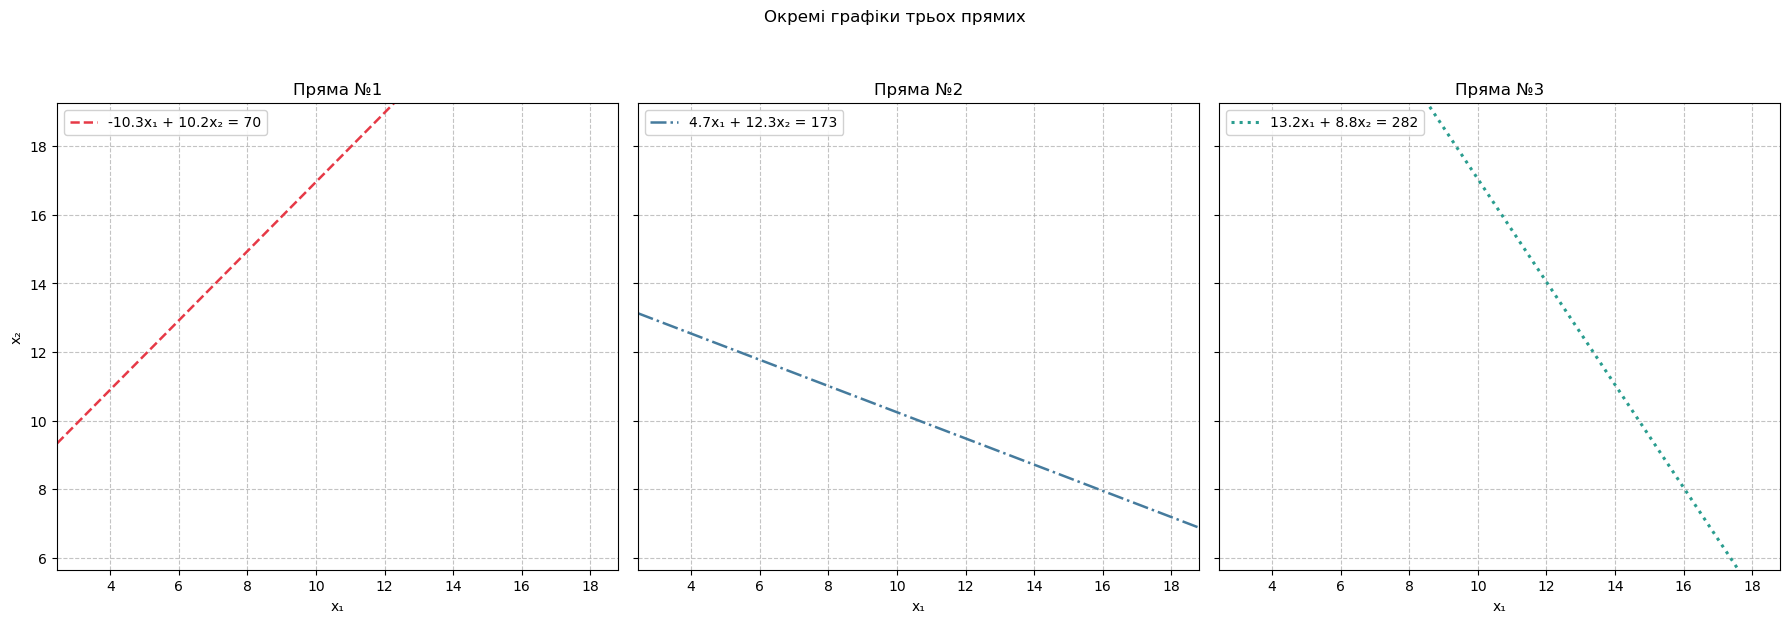

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), dpi=100, sharey=True)

# --- Пряма 1: -10.3x₁ + 10.2x₂ = 70 ---
ax1.plot(x1, x2_1, '--', color='#e63946', linewidth=1.8,
         label='-10.3x₁ + 10.2x₂ = 70')
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)
ax1.set_xlabel('x₁')
ax1.set_ylabel('x₂')
ax1.set_title('Пряма №1')
ax1.grid(True, linestyle='--', color='#aaaaaa', linewidth=0.8, alpha=0.7)
ax1.legend(loc='upper left', framealpha=0.9, facecolor='white')
ax1.set_aspect('equal')

# --- Пряма 2: 4.7x₁ + 12.3x₂ = 173 ---
ax2.plot(x1, x2_2, '-.', color='#457b9d', linewidth=1.8,
         label='4.7x₁ + 12.3x₂ = 173')
ax2.set_xlim(x_min, x_max)
ax2.set_xlabel('x₁')
ax2.set_title('Пряма №2')
ax2.grid(True, linestyle='--', color='#aaaaaa', linewidth=0.8, alpha=0.7)
ax2.legend(loc='upper left', framealpha=0.9, facecolor='white')
ax2.set_aspect('equal')

# --- Пряма 3: 13.2x₁ + 8.8x₂ = 282 ---
ax3.plot(x1, x2_3, ':', color='#2a9d8f', linewidth=2.2,
         label='13.2x₁ + 8.8x₂ = 282')
ax3.set_xlim(x_min, x_max)
ax3.set_xlabel('x₁')
ax3.set_title('Пряма №3')
ax3.grid(True, linestyle='--', color='#aaaaaa', linewidth=0.8, alpha=0.7)
ax3.legend(loc='upper left', framealpha=0.9, facecolor='white')
ax3.set_aspect('equal')

fig.suptitle("Окремі графіки трьох прямих", y=1.02)

fig.tight_layout()
save_all(fig, "1_variant6")
plt.show()


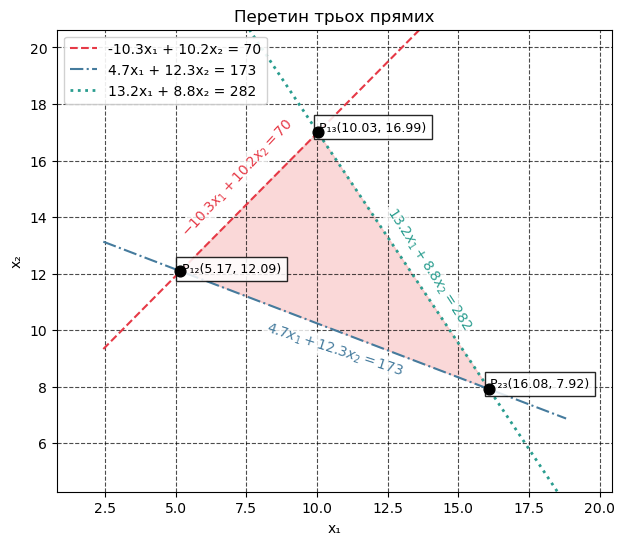

In [31]:
fig_main, ax = plt.subplots(figsize=(8, 6), dpi=100)

# --- ПРЯМІ ---
ax.plot(x1, x2_1, '--', color='#e63946', linewidth=1.5,
        label='-10.3x₁ + 10.2x₂ = 70')
ax.plot(x1, x2_2, '-.', color='#457b9d', linewidth=1.5,
        label='4.7x₁ + 12.3x₂ = 173')
ax.plot(x1, x2_3, ':',  color='#2a9d8f', linewidth=2.0,
        label='13.2x₁ + 8.8x₂ = 282')

# --- ТОЧКИ ПЕРЕТИНУ ---
ax.scatter(*P12, color='black', s=60, zorder=5)
ax.scatter(*P13, color='black', s=60, zorder=5)
ax.scatter(*P23, color='black', s=60, zorder=5)

ax.text(P12[0] + 0.05, P12[1] - 0.05,
        f'P₁₂({P12[0]:.2f}, {P12[1]:.2f})',
        fontsize=9, bbox=dict(fc='white', alpha=0.85))

ax.text(P13[0] + 0.05, P13[1] + 0.05,
        f'P₁₃({P13[0]:.2f}, {P13[1]:.2f})',
        fontsize=9, bbox=dict(fc='white', alpha=0.85))

ax.text(P23[0] + 0.05, P23[1] + 0.05,
        f'P₂₃({P23[0]:.2f}, {P23[1]:.2f})',
        fontsize=9, bbox=dict(fc='white', alpha=0.85))

# --- ЗАПОВНЕННЯ ТРИКУТНИКА ---
ax.fill([P12[0], P13[0], P23[0]],
        [P12[1], P13[1], P23[1]],
        color='lightcoral', alpha=0.3)

# --- МАСШТАБУВАННЯ ---
tri_x = [P12[0], P13[0], P23[0]]
tri_y = [P12[1], P13[1], P23[1]]

rx = max(tri_x) - min(tri_x)
ry = max(tri_y) - min(tri_y)

pad_x = rx * 0.4
pad_y = ry * 0.4

ax.set_xlim(min(tri_x) - pad_x, max(tri_x) + pad_x)
ax.set_ylim(min(tri_y) - pad_y, max(tri_y) + pad_y)

# --- ПІДПИСИ НА ЛІНІЯХ ---
label_line(ax, L1, r'$-10.3x_1 + 10.2x_2 = 70$',
           '#e63946', (x_min, x_max),
           offset_pts=(-70, -45), angle=47)

label_line(ax, L2, r'$4.7x_1 + 12.3x_2 = 173$',
           '#457b9d', (x_min, x_max),
           offset_pts=(0, -14), angle=-18)

label_line(ax, L3, r'$13.2x_1 + 8.8x_2 = 282$',
           '#2a9d8f', (x_min, x_max),
           offset_pts=(68, -80), angle=-57)

# --- НАЛАШТУВАННЯ ГРАФІКА ---
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_title('Перетин трьох прямих')
ax.grid(True, linestyle='--', color='#000000',
        linewidth=0.8, alpha=0.7)
ax.legend(loc='upper left', framealpha=0.9, facecolor='white')
ax.set_aspect('equal')

save_all(fig_main, "2_variant6")
plt.show()
